In [14]:
#import packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from causaldata import Mroz

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [15]:
#check
df = Mroz.load_pandas().data
df = df.iloc[:,1:] #drop the first column (saved index)
df.head()

,lfp,k5,k618,age,wc,hc,lwg,inc
0,True,1,0,32,False,False,1.210165,10.910001
1,True,0,2,30,False,False,0.328504,19.500000
2,True,1,3,35,False,False,1.514128,12.039999
3,True,0,3,34,False,False,0.092115,6.800000
4,True,1,2,31,True,False,1.524280,20.100000


In [16]:
#just working women
df = df[df['lfp'] == True]

#create unlogged earnings
df['earn'] = df['lwg'].apply('exp')

#check
df.head()

,lfp,k5,k618,age,wc,hc,lwg,inc,earn
0,True,1,0,32,False,False,1.210165,10.910001,3.354037
1,True,0,2,30,False,False,0.328504,19.500000,1.388889
2,True,1,3,35,False,False,1.514128,12.039999,4.545455
3,True,0,3,34,False,False,0.092115,6.800000,1.096491
4,True,1,2,31,True,False,1.524280,20.100000,4.591837


### Step 1 - Scatterplot

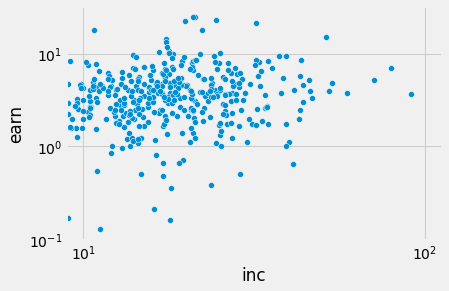

In [17]:
sns.scatterplot('inc',
                'earn',
                data = df).set(xscale = 'log', yscale = 'log')
plt.show()

### Step 2 - conditional mean by college attendance

In [18]:
#wc is the college variable
df.groupby('wc')[['earn']].mean()

,earn
wc,
False,3.583539
True,5.349448


### Step 3 - Conditional mean by bins

In [19]:
# 10 bins
df['inc_bin'] = pd.cut(df['inc'],10)

df.groupby('inc_bin')[['earn']].mean()

,earn
inc_bin,
"(-0.12, 9.074]",3.091594
"(9.074, 18.177]",3.826430
"(18.177, 27.28]",4.954454
"(27.28, 36.383]",4.563332
"(36.383, 45.485]",4.241790
"(45.485, 54.588]",6.139739
"(54.588, 63.691]",3.825000
"(63.691, 72.794]",5.232558
"(72.794, 81.897]",7.015306


### Step 4 - Draw the LOESS and Linear Regression curves

In [21]:
#log axes
df['linc'] = df['inc'].apply('log')

#check
df.head()

,lfp,k5,k618,age,wc,hc,lwg,inc,earn,inc_bin,linc
0,True,1,0,32,False,False,1.210165,10.910001,3.354037,"(9.074, 18.177]",2.389680
1,True,0,2,30,False,False,0.328504,19.500000,1.388889,"(18.177, 27.28]",2.970414
2,True,1,3,35,False,False,1.514128,12.039999,4.545455,"(9.074, 18.177]",2.488234
3,True,0,3,34,False,False,0.092115,6.800000,1.096491,"(-0.12, 9.074]",1.916923
4,True,1,2,31,True,False,1.524280,20.100000,4.591837,"(18.177, 27.28]",3.000720


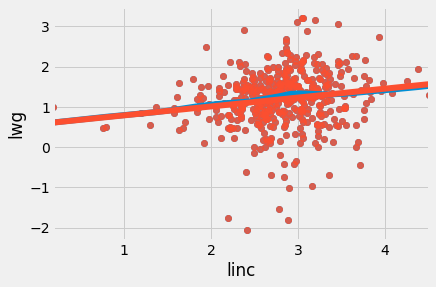

In [27]:
#plot

sns.regplot('linc',
            'lwg',
            data = df,
            lowess = True)

sns.regplot('linc',
            'lwg',
            data = df,
            ci = None)
plt.show()

### Step 5 - Linear Regression, by itself and including controls

In [33]:
model_1 = sm.ols(formula = 'lwg ~ linc', 
                  data = df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    lwg   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.65
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           0.000703
Time:                        11:13:34   Log-Likelihood:                -461.34
No. Observations:                 427   AIC:                             926.7
Df Residuals:                     425   BIC:                             934.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5690      0.185      3.079      0.0

In [40]:
#k5 is number of kids under 5 in the house

model_2 = sm.ols(formula = 'lwg ~ linc + wc + k5',
                 data = df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    lwg   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     10.67
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           8.92e-07
Time:                        11:17:48   Log-Likelihood:                -451.54
No. Observations:                 427   AIC:                             911.1
Df Residuals:                     423   BIC:                             927.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7065      0.184      3.833      0.0